## Notebook de Exemplos: Funções de Aproximação Polinomiais.

Este notebook demonstra o uso de três funções de aproximação:

1.  `regressao`: Ajusta um polinômio de grau 'n' a um conjunto de pontos dados.
2.  `ajuste_linear`: Ajusta uma reta a um conjunto de pontos de dados.
3.  `regressao_logaritmica`: Ajusta uma curva logarítmica a um conjunto de pontos.
4.  `polinomio_de_taylor`: Encontra a aproximação de Taylor para uma função simbólica em torno de um ponto.
5.  `ajuste_trigonometrico`:Calcula o ajuste trigonométrico de um conjunto de pontos (x, y).

### Código

In [ ]:
# Python 3

# Bibliotecas padrão.
import math

# Bibliotecas de terceiros.
import numpy as np
import numpy.typing as npt
import sympy as sp
import matplotlib.pyplot as plt
from typing import List, Tuple



## Funções polinomiais de aproximação.

# Regressão de grau N.
def regressao(dados_x: npt.ArrayLike, dados_y: npt.ArrayLike, grau: int, plot: bool = False) -> np.ndarray:
    """
    Calcula os coeficientes de uma regressão polinomial usando Mínimos Quadrados.

    Esta função ajusta um polinômio de grau 'grau' (y = ... + c_1*x + c_0)
    aos dados, resolvendo o sistema de mínimos quadrados lineares
    A * c = y usando 'np.linalg.lstsq'.

    Args:
        dados_x (npt.ArrayLike): 
            Vetor contendo os valores da variável independente.
        dados_y (npt.ArrayLike): 
            Vetor contendo os valores da variável dependente.
        grau (int): 
            O grau (d) do polinômio a ser ajustado.
        plot (bool, optional): 
            Se `True`, exibe o gráfico dos dados e da curva de regressão.
            Padrão é `False`.

    Returns:
        np.ndarray: 
            Um array numpy contendo os coeficientes do polinômio.
            IMPORTANTE: Os coeficientes são retornados da menor potência
            para a maior (ex: [c_0, c_1, ..., c_grau]).

    Raises:
        ValueError: 
            Se 'dados_x' e 'dados_y' tiverem comprimentos diferentes.
        np.linalg.LinAlgError: 
            Pode ser levantado por 'np.linalg.lstsq' se a matriz
            for singular ou houver problemas numéricos.

    Dependencies:
        - `numpy` (importado como `np`)
        - `matplotlib.pyplot` (importado como `plt`) - Se plot=True

    Notes:
        - A função 'np.linalg.lstsq' é uma forma robusta de resolver
          o problema de mínimos quadrados, geralmente usando decomposição
          SVD ou QR por baixo dos panos.
        - A ordem dos coeficientes retornados ([c_0, c_1, ...]) é o
          inverso da ordem usada por 'np.polyfit' ([... c_1, c_0]).
    """

    if len(dados_x) != len(dados_y):
        raise ValueError("Os dados de x e y devem ter o mesmo comprimento.")

    dados_x = np.asarray(dados_x)
    dados_y = np.asarray(dados_y)

    # Constrói a Matriz de Design (Vandermonde).
    A = np.vstack([dados_x**i for i in range(grau + 1)]).T

    # Resolve o problema de mínimos quadrados A*c = y para c.
    coeficientes, restos, rank, singulares = np.linalg.lstsq(A, dados_y, rcond=None)

    if plot:
        # Gera pontos para a linha de ajuste
        x_fit = np.linspace(dados_x.min(), dados_x.max(), 500)
        
        # Como os nossos estão da menor para a maior, usamos [::-1].
        y_fit = np.polyval(coeficientes[::-1], x_fit)

        plt.figure(figsize=(10, 6))
        plt.scatter(dados_x, dados_y, marker='.', color='blue', label='Dados', alpha=1)

        plt.plot(x_fit, y_fit, 'r-', label=f'Ajuste Polinomial (Grau {grau})', linewidth=2)
        plt.title(f'Aproximação Polinomial de Grau {grau} via Mínimos Quadrados')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.grid(True)
        plt.show()

    return coeficientes

# Regressão Linear.
def ajuste_linear(x: npt.ArrayLike, y: npt.ArrayLike, plot: bool = False) -> tuple[float, float]:
    """
    Calcula o coeficiente angular 'a' e o coeficiente linear 'b'
    de uma regressão linear simples (y = ax + b).

    Args:
        x (npt.ArrayLike): 
            Vetor contendo os valores da variável independente.
        y (npt.ArrayLike): 
            Vetor contendo os valores da variável dependente.
        plot (bool, optional): 
            Se `True`, exibe o gráfico dos dados e da linha de regressão. 
            Padrão é `False`. (Este argumento foi inferido da 
            função `regressao_logaritmica`, mas não estava
            na sua docstring original da linear).

    Returns:
        tuple[float, float]: 
            Uma tupla contendo (a, b), onde:
            a (float): Coeficiente angular da linha de regressão.
            b (float): Coeficiente linear da linha de regressão.

    Raises:
        ValueError: 
            Se 'x' e 'y' tiverem comprimentos diferentes ou se
            tiverem menos de 2 pontos de dados, o que é insuficiente
            para a regressão.

    Dependencies:
        - `numpy` (importada como `np`)
        - `matplotlib.pyplot` (importada como `plt`) - Se plot=True

    Notes:
        - A regressão é realizada utilizando o Método dos Mínimos
          Quadrados Ordinários (MQO).
    """

    # Converte as entradas para arrays numpy para garantir que o resto do código opere de forma consistente.
    x = np.asarray(x)
    y = np.asarray(y)

  # Verificando se os dados podem satisfazer as equações da regressão linear.
    if len(x) != len(y):
        raise ValueError("X e y devem ter o mesmo número de amostras.")
    if len(x) < 2:
        raise ValueError("A regressão requer pelo menos 2 pontos.")

    # Calcula a média de x e de y.
    x_media = np.mean(x)
    y_media = np.mean(y) 

    numerador = np.sum((x - x_media) * (y - y_media))
    denominador = np.sum((x - x_media)**2)

    if np.isclose(denominador, 0):
        raise ValueError("Valores de 'x' são constantes. A regressão linear não pode ser calculada.")

    a = numerador / denominador
    b = y_media - (a * x_media)

    if plot:
        print(f"Coeficientes encontrados:")
        print(f"Inclinação (a): {a:.4f}")
        print(f"Intercepto (b): {b:.4f}")

        # Cria 100 pontos uniformemente espaçados entre o menor e o maior ponto de x1, para criar a reta do primeiro ponto ao fim.
        x2 = np.linspace(min(x), max(x), 100) 

        # Equação da reta de regressão.
        y2 = (a * x2) + b 

        # Plot dos dados e da reta.
        plt.scatter(x, y, color='red', label='Dados Originais') 
        plt.plot(x2, y2, color='blue', linewidth=2, label=f'Reta de Regressão: y = {a:.2f}x + {b:.2f}')

        # Calcula a margem de x e de y.
        x_margin = (max(x) - min(x)) * 0.1
        y_margin = (max(y) - min(y)) * 0.1

        # Limita a margem de x e de y.
        plt.xlim(min(x) - x_margin, max(x) + x_margin)
        plt.ylim(min(y) - y_margin, max(y) + y_margin)

        # Legendas e grade.
        plt.title("Regressão Linear")
        plt.xlabel("Eixo X")
        plt.ylabel("Eixo Y")
        plt.legend()
        plt.grid(True) # Grade quadriculada.

        # Plot.
        plt.show()

    return a, b

# Regressão logarítimica.
def regressao_logaritmica(x: npt.ArrayLike, y: npt.ArrayLike, plot: bool = False) -> tuple[float, float]:
    """
    Calcula os coeficientes 'a' e 'b' de uma regressão logarítmica
    do tipo (y = a * ln(x) + b) e, opcionalmente, plota a função.

    Args:
        x (npt.ArrayLike): 
            Vetor contendo os valores da variável independente.
            IMPORTANTE: Todos os valores de 'x' devem ser estritamente
            positivos (x > 0), pois o logaritmo de valores
            negativos ou zero não é definido.
        y (npt.ArrayLike): 
            Vetor contendo os valores da variável dependente.
        plot (bool, optional): 
            Se `True`, exibe o gráfico dos dados e da curva de regressão. 
            Padrão é `False`.

    Returns:
        tuple[float, float]: 
            Uma tupla contendo (a, b), onde:
            a (float): Coeficiente 'a' que multiplica o termo ln(x).
            b (float): Coeficiente 'b' (intercepto) da linha de regressão.

    Raises:
        ValueError: 
            - Herdado da função 'regressao_linear': Se 'x' e 'y'
              tiverem comprimentos diferentes.
            - Herdado da função 'regressao_linear': Se tiverem menos
              de 2 pontos de dados.
            - Se 'x' contiver valores menores ou iguais a zero.
        RuntimeWarning: 
            Pode ser levantado pelo `numpy` se 'x' contiver valores
            menores ou iguais a zero, resultando em 'NaN' ou '-inf'
            (embora um ValueError seja levantado primeiro por esta função).

    Notes:
        - Este método funciona transformando a variável preditora 'x'
          aplicando o logaritmo natural (ln), e depois utilizando
          a função 'regressao_linear' padrão nos dados transformados
          (ln(x), y).
        - O plot (opcional) mostra os pontos de dados e a função
          aproximadora.
    """

    # Converte as entradas para arrays numpy para garantir que o resto do código opere de forma consistente.
    x = np.asarray(x)
    y = np.asarray(y)

    # Verifica se algum x é negativo, pois log(negativo) é indefinido e dará erro.
    if np.any(x <= 0):
        raise ValueError("Todos os valores de 'x' devem ser positivos para a regressão logarítmica.")
    
    # Transforma a variável x aplicando o logaritmo natural
    log_x = np.log(x)

    # Usa a função de regressão linear já existente nos dados transformados.
    a, b = ajuste_linear(log_x, y)

    if plot:
        print(f"Coeficientes encontrados:")
        print(f"a: {a:.4f}")
        print(f"b: {b:.4f}")

        # Cria 100 pontos uniformemente espaçados entre o menor e o maior ponto de x1, para criar a função do primeiro ponto ao fim.
        x2 = np.linspace(min(x), max(x), 100)

        # Equação da função de regressão.
        y2 = (a * np.log(x2)) + b

        # Plot dos dados e da função.
        plt.scatter(x, y, color='red', label='Dados Originais')
        plt.plot(x2, y2, color='blue', linewidth=2, label=f'Função de Regressão: y = {a:.2f}*ln(x) + {b:.2f}')

        # Calcula a margem de x e de y.
        x_margin = (max(x) - min(x)) * 0.1
        y_margin = (max(y) - min(y)) * 0.1

        # Limita a margem de x e de y.
        plt.xlim(min(x) - x_margin, max(x) + x_margin)
        plt.ylim(min(y) - y_margin, max(y) + y_margin)

        # Legendas e grade.
        plt.title("Regressão Logarítmica")
        plt.xlabel("Eixo X")
        plt.ylabel("Eixo Y")
        plt.legend()
        plt.grid(True) # Grade quadriculada.

        # Plot.
        plt.show()

    return a, b

# Polinômio de Taylor.
def polinomio_de_taylor(function: sp.Expr, x_symbol: sp.Symbol, point: float, times: int, plot: bool = False)-> sp.Expr:
    """
    Calcula, imprime e opcionalmente plota o Polinômio de Taylor
    para uma dada função em torno de um ponto.

    Args:
        function (sp.Expr): 
            A expressão simbólica da função que será aproximada.
        x_symbol (sp.Symbol): 
            O símbolo em relação ao qual o polinômio será construído
            e as derivadas calculadas.
        point (float): 
            O ponto de expansão 'a' (o centro) em torno do qual a
            função será aproximada. IMPORTANTE: Ponto será do eixo x.
        times (int): 
            O número de termos a serem usados na série. O polinômio
            resultante terá grau 'times - 1'.
        plot (bool, optional): 
            Se `True`, gera um gráfico comparando a função original e
            o polinômio de Taylor. Padrão é `False`.

    Returns:
        sympy.Expr: 
            A expressão simbólica do Polinômio de Taylor resultante.

    Dependencies:
        - `sympy` (importada como `sp`)
        - `math`
        - `numpy` (importado como `np`) - Necessário se plot=True.
        - `matplotlib.pyplot` (importado como `plt`) - Necessário se plot=True.

    Notes:
        - Esta função utiliza a biblioteca SymPy para realizar a
          diferenciação simbólica e a construção do polinômio.
        - Se plot = True, utiliza Numpy e Matplotlib para visualizar
          a aproximação.
        - O plot (opcional) mostra a função e a aproximação de Taylor.
    """

    # Inicia o polinômio, iremos adicionar os termos aqui depois.
    f_poly = 0

    # Operação equivalente ao somatório do polinômio de Taylor.
    for i in range(times):
            
            # Calcula a i-ésima derivada simbólica (f"'(x)).
            derivada_i_simbolica = sp.diff(function, x_symbol, i)
            
            # Avalia a derivada no ponto 'a'.
            derivada_no_ponto = derivada_i_simbolica.subs(x_symbol, point)
            
            # Calcula o fatorial.
            fatorial = math.factorial(i)

            # Monta o i-ésimo termo do polinômio.
            termo_polinomio = (derivada_no_ponto * (x_symbol - point)**i) / fatorial
            
            # Adiciona ao polinômio total.
            f_poly += termo_polinomio

    print(f"O polinômio de Taylor com {times} termos é:")
    print(f_poly)
    
    if plot:
        print("\nGerando gráfico de comparação.")
        
        # Convertendo expressões simbólicas em funções numéricas.
        # 'numpy' é usado para permitir que as funções lidem com arrays do numpy.
        f_original_num = sp.lambdify(x_symbol, function, 'numpy')
        f_poly_num = sp.lambdify(x_symbol, f_poly, 'numpy')

        # Definindo o intervalo de plotagem.
        # O np.linspace cria um array de pontos uniformemente espaçados.
        x_vals = np.linspace(point - 2.5, point + 2.5, 400)

        # Calcula os valores 'y' para os "pontos reais" (função original).
        y_original = f_original_num(x_vals)
            
        # Calcula os valores 'y' para a "função ajustada" (polinômio).
        y_poly = f_poly_num(x_vals)

        # Cria o gráfico.
        plt.figure(figsize=(10, 6))
        
        # Plota a função original.
        plt.plot(x_vals, y_original, color='red', label=f"Função Original: ${sp.latex(function)}$", 
                linewidth=2, linestyle='--')
            
        # Plota o polinômio.
        plt.plot(x_vals, y_poly, color='blue', label=f"Polinômio de (Grau {times-1}): ${sp.latex(f_poly)}$", 
                    linewidth=2, alpha=0.8)
            
        # Marca o ponto de expansão 'point'.
        y_point = f_original_num(point)
        plt.plot(point, y_point, 'ro', label=f'Ponto de Expansão ($a={point}$)')

        # Configurações gerais do gráfico.
        plt.title(f"Aproximação de Taylor (Grau {times-1}) em torno de $x={point}$")
        plt.xlabel(str(x_symbol))
        plt.ylabel('$f(x)$')
        plt.legend(fontsize='small')
        plt.grid(True)
        plt.axvline(x=point, color='gray', linestyle=':', linewidth=1)
        plt.axhline(y=y_point, color='gray', linestyle=':', linewidth=1)

        # Define limites de 'y'.
        y_range = np.nanmax(y_original) - np.nanmin(y_original)
        if y_range < 1: y_range = 10 # Evita o zoom extremo.
        plt.ylim(np.nanmin(y_original) - y_range * 0.5, np.nanmax(y_original) + y_range * 0.5)

        # Plot.
        plt.show()

    return f_poly

def ajuste_trigonometrico(x: List[float], y: List[float], periodo: float, plot: bool = False) -> Tuple[float, float, float]:
    '''
    Calcula o ajuste trigonométrico (Série de Fourier de 1ª ordem)
    de um conjunto de pontos (x, y) usando o método dos mínimos quadrados.
    Encontra os coeficientes c0, c1, c2 para a função:
    y = c0 + c1*cos(omega*x) + c2*sin(omega*x)
    onde omega = 2*pi / periodo.

    Parâmetros :
        x : Lista ou array de valores para o eixo x.
        y : Lista ou array de valores para o eixo y.
        periodo (T) : O período fundamental estimado dos dados. Estimar
                      corretamente é crucial para um bom ajuste.
        plot : Se True, plota o gráfico.

    Retorna :
        Uma tupla (c0, c1, c2) contendo os coeficientes do ajuste.
        (c0 = offset, c1 = amplitude do cosseno, c2 = amplitude do seno)
    '''
    x_arr = np.array(x)
    y_arr = np.array(y)

    if len(x_arr) != len(y_arr):
        raise ValueError("Os vetores x e y devem ter o mesmo tamanho.")
    if len(x_arr) < 3:
         raise ValueError("São necessários pelo menos 3 pontos para este ajuste (3 coeficientes).")
    if periodo <= 0:
        raise ValueError("O período deve ser um valor positivo.")

    # Calcular frequência angular
    omega = (2 * np.pi) / periodo

    # 1. Montar a matriz do sistema (Design Matrix) A
    # Queremos resolver Ac = y, onde c = [c0, c1, c2]
    # Cada linha de A é [1, cos(omega*xi), sin(omega*xi)]
    A = np.column_stack([
        np.ones_like(x_arr),    # Coluna para c0 (intercepto)
        np.cos(omega * x_arr),  # Coluna para c1 (cosseno)
        np.sin(omega * x_arr)   # Coluna para c2 (seno)
    ])

    # 2. Resolver o sistema de equações lineares por mínimos quadrados
    # c = (A^T A)^-1 * (A^T y)
    # O np.linalg.lstsq faz isso de forma eficiente e estável
    # Retorna (coeficientes, resíduos, rank, valores singulares)
    # Pegamos apenas o primeiro item (coeficientes) [0]
    try:
        coeficientes, _, _, _ = np.linalg.lstsq(A, y_arr, rcond=None)
    except np.linalg.LinAlgError as e:
        raise ValueError(f"Não foi possível resolver o sistema: {e}")

    c0, c1, c2 = coeficientes

    if plot:
        plt.figure(figsize=(10, 6))
        # Pontos originais
        plt.scatter(x_arr, y_arr, color='red', label='Pontos Reais (Dados)')

        # Gerar linha para o ajuste
        # Usamos mais pontos (500) para garantir uma curva suave
        x_line = np.linspace(np.min(x_arr), np.max(x_arr), 500) 
        y_line = c0 + c1 * np.cos(omega * x_line) + c2 * np.sin(omega * x_line)

        plt.plot(x_line, y_line, color='purple', linewidth=2,
                 label=f'Ajuste Trig: y = {c0:.2f} + {c1:.2f}cos(ωx) + {c2:.2f}sin(ωx)\n(Período T={periodo:.2f}, ω={omega:.2f})')
        
        plt.title("Ajuste Trigonométrico por Mínimos Quadrados")
        plt.xlabel("Eixo x")
        plt.ylabel("Eixo y")
        plt.legend()
        plt.grid(True)
        plt.show()

    return (c0, c1, c2)

### Testes de regressão de grau 'n'

Média real dos dados Y: 10.0000


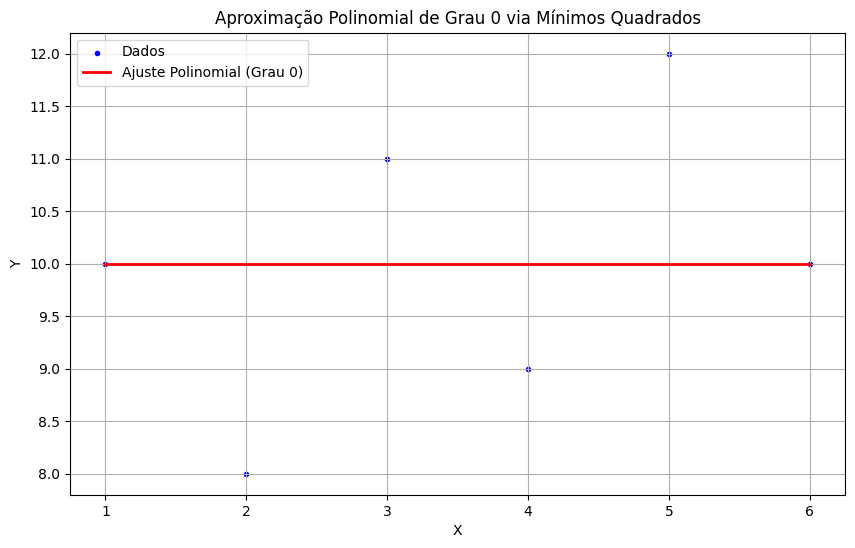

Coeficiente [c0] encontrado (deve ser a média): 10.0000


In [ ]:
# Teste 1: aproximando com grau 0.

x1 = np.array([1, 2, 3, 4, 5, 6])
y1 = np.array([10, 8, 11, 9, 12, 10]) # média = 10

print(f"Média real dos dados Y: {np.mean(y1):.4f}")

coefs1 = regressao(x1, y1, grau=0, plot=True)
print(f"Coeficiente [c0] encontrado (deve ser a média): {coefs1[0]:.4f}")

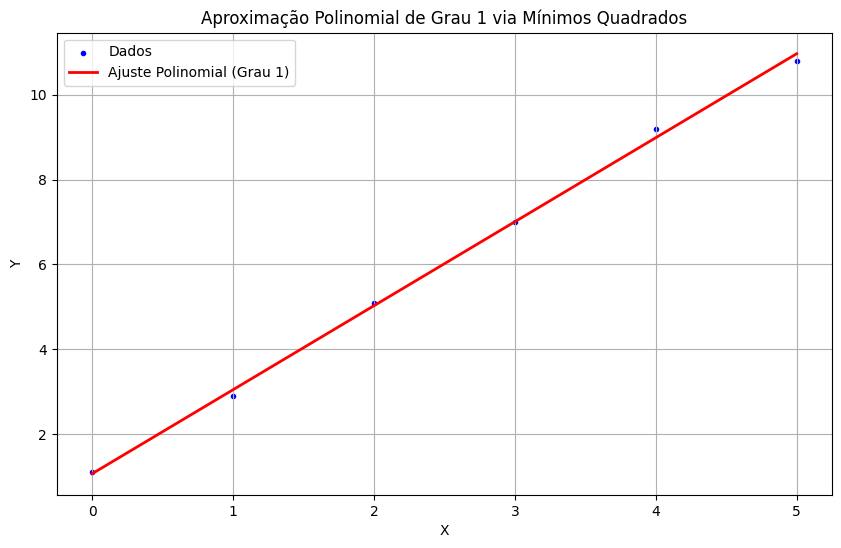

Coeficientes [c0, c1] encontrados (esperado prox. de [1, 2]): [1.0667 1.98  ]


In [ ]:
# Teste 2: Pontos seguindo uma distribuição y = 2x + 1, grau 1.

x2 = np.array([0, 1, 2, 3, 4, 5])
y2 = np.array([1.1, 2.9, 5.1, 7.0, 9.2, 10.8]) # Pontos próximos de y = 2x + 1
coefs2 = regressao(x2, y2, grau=1, plot=True)
print(f"Coeficientes [c0, c1] encontrados (esperado prox. de [1, 2]): {np.round(coefs2, 4)}")

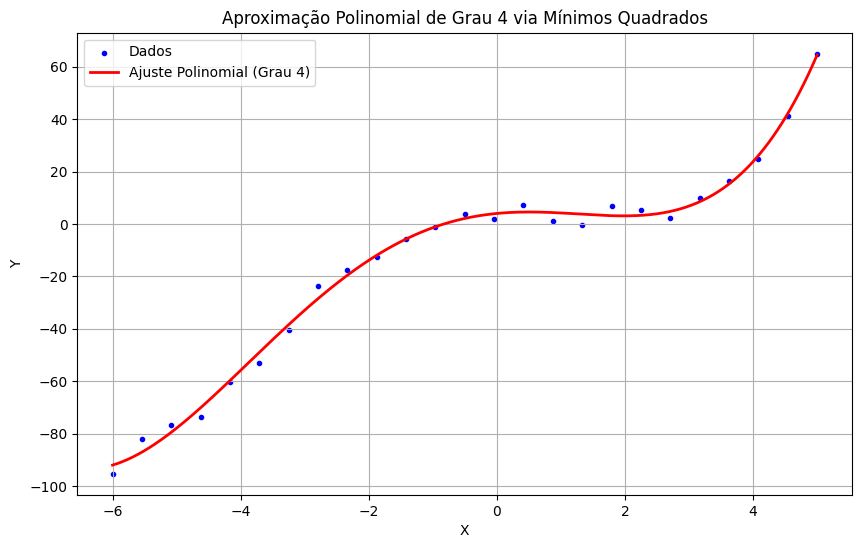

Coefs Reais [c0..c4]: [ 5.   2.  -3.   0.5  0.1]
Coefs Calculados:    [ 4.0433  2.3414 -2.7202  0.4759  0.0916]

Verificação de Grau 4 concluída.


In [ ]:
# Teste 3: Aproximando uma função de grau 4, iremos fazer com dois conjuntos de pontos diferentes para ver a diferença.

coefs_reais = [5, 2, -3, 0.5, 0.1]

x_dados = np.linspace(-6, 5, 25)

y_verdadeiro = np.polyval(coefs_reais[::-1], x_dados)

ruido = np.random.normal(loc=0.0, scale=3.0, size=x_dados.shape)
y_dados_com_ruido = y_verdadeiro + ruido

coefs_calculados = regressao(x_dados, y_dados_com_ruido, grau=4, plot=True)

print(f"Coefs Reais [c0..c4]: {np.round(coefs_reais, 4)}")
print(f"Coefs Calculados:    {np.round(coefs_calculados, 4)}")
print("\nVerificação de Grau 4 concluída.")

### Testes de ajuste linear.

Coeficientes encontrados:
Inclinação (a): 2.7998
Intercepto (b): 8.6170


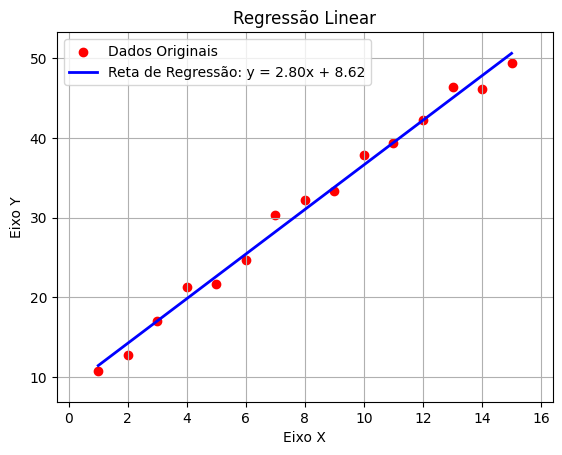

In [ ]:
# Teste 1:
# Simulação de um conjunto de dados que segue a reta 'y = 3x + 7' com um pequeno ruído.

np.random.seed(42) # Para resultados reprodutíveis
x_linear = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y_linear = 3 * x_linear + 7 + np.random.randn(15) * 1.5 # y = 3x + 7 + ruído

# Executando a função com plot
a, b = ajuste_linear(x_linear, y_linear, plot=True)

In [ ]:
# Teste 2:
# Rodando o código com números iguais em 'x'.
# Esperado: erro, pois na regressão linear se tivermos números iguais em x, o denominador é zero e divisão por zero e indefinida.

x_constante = [5, 5, 5, 5, 5]
y_constante = [1, 2, 3, 4, 5]

try:
    ajuste_linear(x_constante, y_constante)
except ValueError as e:
    print(f"Erro capturado: {e}")

Erro capturado: Valores de 'x' são constantes. A regressão linear não pode ser calculada.


### Testes de regressão logarítmica.

Coeficientes encontrados:
a: 3.6922
b: 2.2756


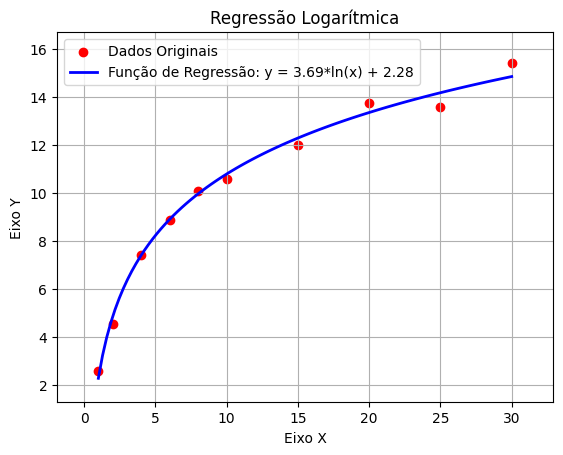

In [ ]:
# Teste 1:
# Simulação de um conjunto de dados que segue a função 'y = 4*ln(x) + 1.5' com um pequeno ruído.

np.random.seed(101)
x_log = np.array([1, 2, 4, 6, 8, 10, 15, 20, 25, 30])
y_log = 4 * np.log(x_log) + 1.5 + np.random.randn(10) * 0.4 # y = 4*ln(x) + 1.5 + ruído

# Executando a função com plot
a_log, b_log = regressao_logaritmica(x_log, y_log, plot=True)

In [ ]:
# Teste 2:
# Rodando o código com um número zero ou negativo em x.
# Esperado: erro, pois ln(0) ou ln(negativo) é indefinido pela matemática.

x_zero = np.array([0, -1, 2, 3])
y_zero = np.array([1, 2, 3, 4])

try:
    regressao_logaritmica(x_zero, y_zero)
except ValueError as e:
    print(f"Erro capturado: {e}")

Erro capturado: Todos os valores de 'x' devem ser positivos para a regressão logarítmica.


### Testes de polinômio de Taylor.

In [ ]:
# Definindo o símbolo para o sympy.
x = sp.Symbol('x')

O polinômio de Taylor com 6 termos é:
x**5/120 - x**3/6 + x

Gerando gráfico de comparação.


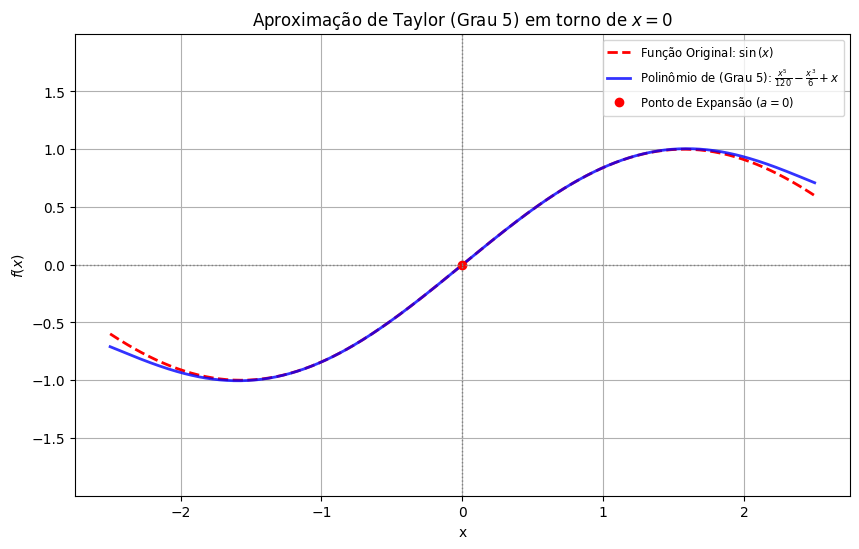

In [ ]:
# Teste 1:
# Polinômio de Taylor de grau 5 (times - 1) da função sin(x) no ponto 0.

funcao_seno = sp.sin(x)
p_seno = polinomio_de_taylor(funcao_seno, x, point=0, times=6, plot=True)

O polinômio de Taylor com 4 termos é:
-x - (x - 1)**3 + (x - 1)**2 + 2

Gerando gráfico de comparação.


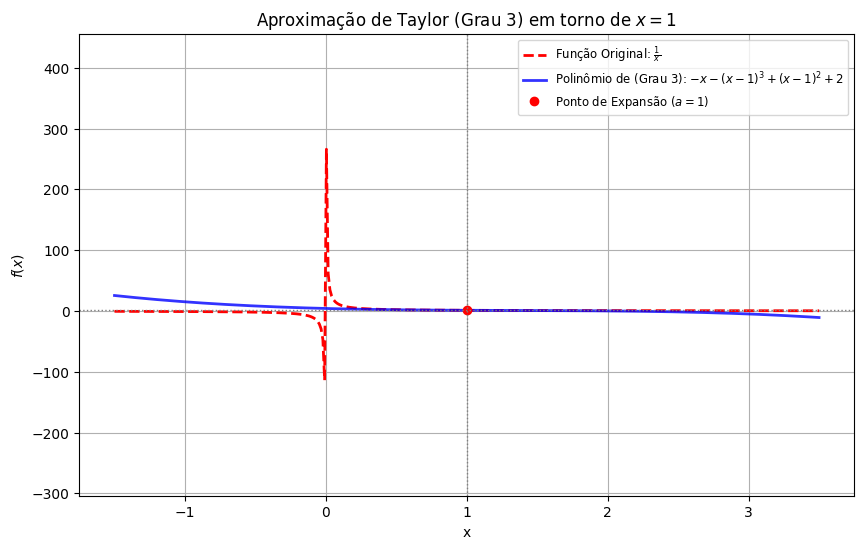

In [ ]:
# Teste 2:
# Polinômio de Taylor de grau 3 (times - 1) da função 1/x no ponto 1.

funcao_inversa = 1/x
p_inv = polinomio_de_taylor(funcao_inversa, x, point=1, times=4, plot=True)

O polinômio de Taylor com 5 termos é:
x**4/24 + x**3/6 + x**2/2 + x + 1

Gerando gráfico de comparação.


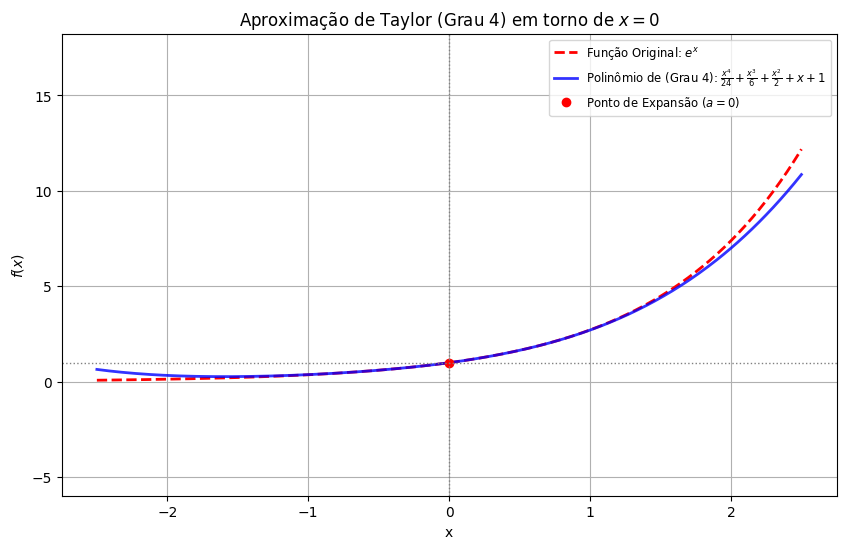

In [ ]:
# Teste 3:
# # Polinômio de Taylor de grau 3 (times - 1) da função exp(x) no ponto 0.

funcao_exp = sp.exp(x)
p_exp = polinomio_de_taylor(funcao_exp, x, point=0, times=5, plot=True)

In [ ]:
#Exemplo aproximacao por minimos quadrados
if __name__ == "__main__":

    print("Executando teste do ajuste_linear com dados do exemplo:")

    # Dados do Exemplo de uso da sua imagem:
    x = [0, 1, 2, 3, 4]
    y = [1.1, 1.9, 3.0, 3.9, 5.2]

    # 1. Chamar a função para obter os coeficientes
    # (definindo plot=False para não mostrar o gráfico agora)
    a, b = ajuste_linear(x, y, plot=False)

    # Formatando a saída exatamente como no exemplo
    print(f"y = {a:.2f}x + {b:.2f}")

    print("# Saída esperada:")
    print("# y = 1.02x + 0.98")

    # 2. Chamar a função com plot=True para testar a visualização
    print("\nGerando gráfico de comparação (plot=True)...")
    ajuste_linear(x, y, plot=True)

### Testes de ajuste trigonométrico

In [ ]:
print("--- Exemplo de Ajuste Trigonométrico ---")
    
# Gerando dados senoidais com ruído
# Vamos usar um período T = 10. Então omega = 2*pi/10
T_real = 10.0
omega_real = (2 * np.pi) / T_real
    
x_trig = np.linspace(0, 20, 50) # 50 pontos de 0 a 20 (2 períodos)
    
# y = 5.0 + 3.0*cos(wx) + 2.0*sin(wx) + ruído
ruido = np.random.normal(0, 0.5, x_trig.shape) # Ruído gaussiano
y_trig = 5.0 + 3.0 * np.cos(omega_real * x_trig) + 2.0 * np.sin(omega_real * x_trig) + ruido

# Chama a função de ajuste trigonométrico
# Note que precisamos *informar* o período que suspeitamos para os dados.
# Se errarmos muito o período, o ajuste será ruim.
c0, c1, c2 = ajuste_trigonometrico(x_trig, y_trig, periodo=T_real, plot=True)
print(f"Coeficientes do Ajuste Trigonométrico:")
print(f"c0 (offset) = {c0:.4f} (Esperado: 5.0)")
print(f"c1 (cos)    = {c1:.4f} (Esperado: 3.0)")
print(f"c2 (sin)    = {c2:.4f} (Esperado: 2.0)")